# Resume Classification
[Resume Dataset Link](https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_resume = pd.read_csv('ResumeDataSet.csv')
df_resume.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## Exploratory Data Analysis (EDA)

In [4]:
df_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:
df_resume['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

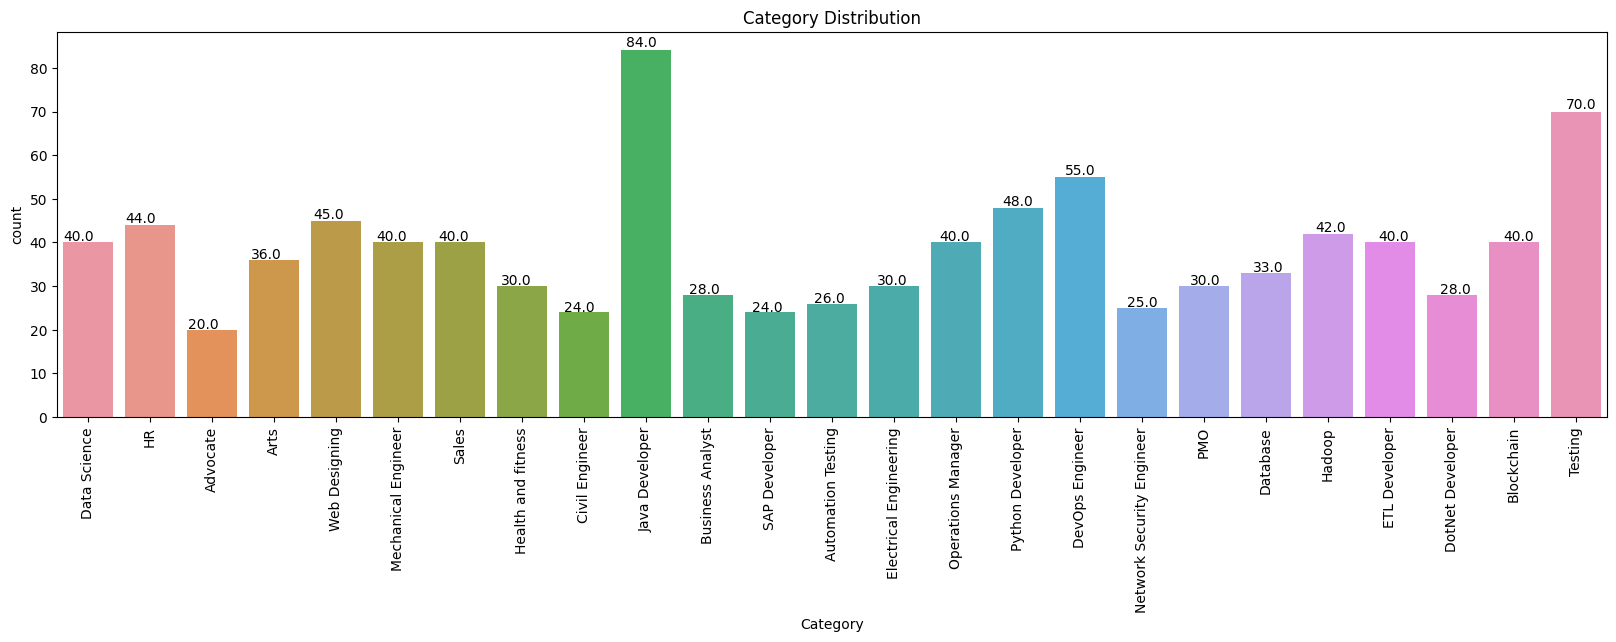

In [6]:
plt.figure(figsize=(20, 5))
plt.title('Category Distribution')
plt.xticks(rotation=90)
ax = sns.countplot(x='Category', data=df_resume)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.01, p.get_height()*1.01))
plt.show()

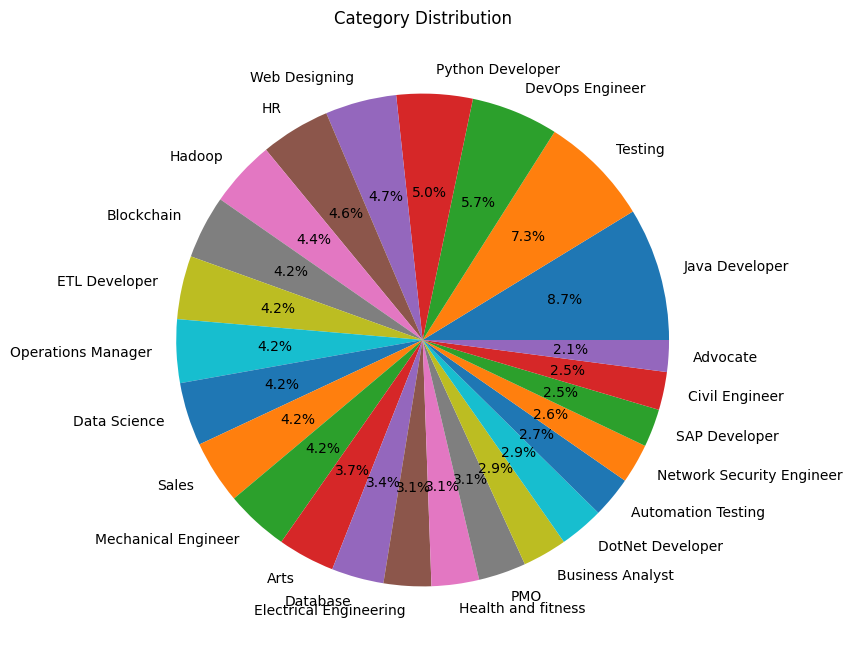

In [7]:
categories_distribution = df_resume['Category'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(categories_distribution, labels=categories_distribution.index, autopct="%1.1f%%")
plt.title('Category Distribution')
plt.show()

## Preprocessing

In [8]:
import re

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df_resume['cleaned_resume'] = df_resume.Resume.apply(cleanResume)

In [9]:
import spacy

nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(tokens)

# Apply the function to the 'cleaned_resume' column
df_resume['cleaned_resume'] = df_resume['cleaned_resume'].apply(preprocess_text)

In [15]:
df_resume.to_csv('processed_resume.csv')

Word Cloud

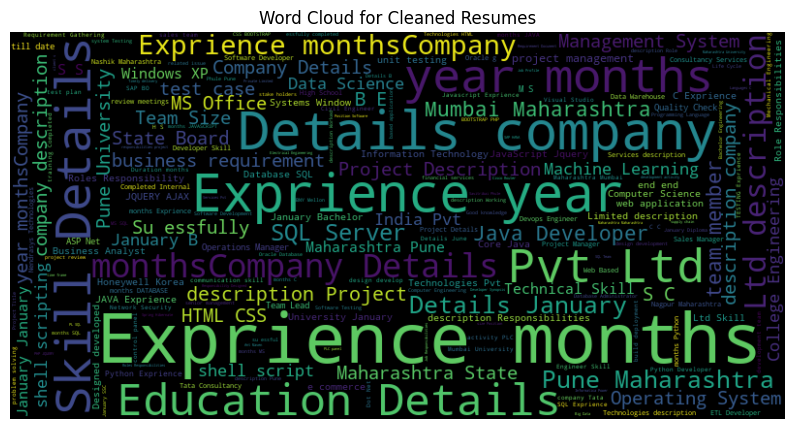

In [10]:
from wordcloud import WordCloud

all_resumes_text = ' '.join(df_resume['cleaned_resume'])

word_cloud = WordCloud(width=800, height=400).generate(all_resumes_text)

plt.figure(figsize=(10, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cleaned Resumes')
plt.show()

## Text Classification

1. TF-IDF vectorization
2. Model Training and making predictions
3. Evaluating models' performance

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [12]:
X = df_resume['cleaned_resume']
y = df_resume['Category']

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
word_features = tfidf.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(word_features, y, test_size=0.2, random_state=42)

Logistic Regression

In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
    

KNN Classifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
    

### Sentence Transformer

In [16]:
df_resume = pd.read_csv('processed_resume.csv')

In [17]:
from sentence_transformers import SentenceTransformer

X = df_resume['cleaned_resume']
y = df_resume['Category']

# Load a pre-trained sentence transformer model
MODEL_NAME = 'bert-base-nli-mean-tokens'
model = SentenceTransformer(MODEL_NAME)

In [19]:
from tqdm import tqdm
import numpy as np

In [21]:
# Encode the cleaned resumes using sentence transformer
# X_embeddings = model.encode(X)

X_embeddings = np.zeros((len(X), model.get_sentence_embedding_dimension()))

for i in tqdm(range(len(X)), desc="Encoding Sentences", unit="sentences"):
    X_embeddings[i] = model.encode(X.iloc[i])

Encoding Sentences:   0%|          | 0/962 [00:00<?, ?sentences/s]

Encoding Sentences: 100%|██████████| 962/962 [06:54<00:00,  2.32sentences/s]


In [ ]:
# import pickle

# with open('sentence_embeddings.pkl', 'wb') as file:
#     pickle.dump(X_embeddings, file)

In [24]:
X_embeddings.shape

(962, 768)

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)

# Train a logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       0.89      1.00      0.94         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00  

c:\Users\Suraj Pathak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
